In [2]:
import sys
print(sys.version)
#import six
import cv2
print(cv2.__version__)
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
#import tensorflow as tf
%matplotlib inline

3.5.3 |Continuum Analytics, Inc.| (default, May 15 2017, 10:43:23) [MSC v.1900 64 bit (AMD64)]
3.1.0


In [15]:
vc = cv2.VideoCapture(1)

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False
    
print(is_capturing)

while is_capturing:
    try:    # Lookout for a keyboardInterrupt to stop the script
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
        webcam_preview.set_data(frame)
        plt.draw()

        display.clear_output(wait=True)
        display.display(plt.gcf())
        plt.pause(0.01)    # the pause time is = 1 / framerate
    except KeyboardInterrupt:
        vc.release()


error: ..\..\..\modules\imgproc\src\color.cpp:7341: error: (-215) scn == 3 || scn == 4 in function cv::ipp_cvtColor


In [15]:
vc.release()

True
(480, 640)
(8, 8)
[[ 0.32941176  0.41764706  0.48823529  0.56470588  0.75294118  1.
   0.67647059  0.38235294]
 [ 0.46470588  0.54705882  0.57647059  0.57058824  0.6         0.59411765
   0.52941176  0.42352941]
 [ 0.55294118  0.67058824  0.71764706  0.17647059  0.21176471  0.55294118
   0.55294118  0.54117647]
 [ 0.60588235  0.75294118  0.61764706  0.08235294  0.18823529  0.46470588
   0.63529412  0.62352941]
 [ 0.61764706  0.75882353  0.57058824  0.23529412  0.35294118  0.54117647
   0.68823529  0.65882353]
 [ 0.58823529  0.70588235  0.50588235  0.28235294  0.44705882  0.72352941
   0.69411765  0.63529412]
 [ 0.52352941  0.62352941  0.30588235  0.10588235  0.27647059  0.44705882
   0.65294118  0.58235294]
 [ 0.21764706  0.24705882  0.          0.11764706  0.17647059  0.13529412
   0.22941176  0.24117647]]


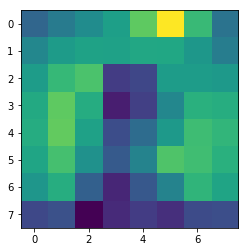

In [16]:
vc = cv2.VideoCapture(1)

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    if frame is not None:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    # makes the blues image look real colored
        webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False
    
print(is_capturing)
while is_capturing:
    try:    # Lookout for a keyboardInterrupt to stop the script
        is_capturing, frame = vc.read()
        if frame is not None:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    # makes the blues image look real colored
            print(frame.shape) # (480, 640) * (1/15, 1/20) = (32, 32)
            #res = cv2.resize(frame, None, fx=1/20, fy=1/15, interpolation=cv2.INTER_AREA) # 32, 32
            #res = cv2.resize(frame, None, fx=1/40, fy=1/30, interpolation=cv2.INTER_AREA) # 16, 16
            res = cv2.resize(frame, None, fx=1/80, fy=1/60, interpolation=cv2.INTER_AREA) # 8, 8
            #print(res.shape)
            res_min = np.min(res)
            res_max = np.max(res)
            scaled = (res - res_min)/float(res_max - res_min)
            flipped = cv2.flip(scaled, 1)
            webcam_preview = plt.imshow(flipped)
            webcam_preview.set_data(flipped)
            plt.draw()
            print(flipped)
            display.clear_output(wait=True)
            display.display(plt.gcf())
    except KeyboardInterrupt:
        vc.release()
